In [2]:
import numpyro
from Model.Energy import MixtureSineMultivariateVonMisesEnergy
from Model.Proposal import GaussianProposal, MultivariateVonMisesProposal, UniformProposal
from Data import get_dataloader_from_data
import matplotlib.pyplot as plt
import numpy as np
import torch 
from Model.Trainer import SNLTrainer
import os

/opt/miniconda3/envs/lime_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Set all the seed :

np.random.seed(0)
torch.manual_seed(0)

# Target Distribution 

In [11]:
phi_1 = torch.tensor([0.0, 0.0, 0.0])
kappa_1 = torch.tensor([15.0, 10.0, 15.0])
lam_1 = torch.zeros((3,3))
lam_1[0,1] = 4.0
lam_1[0,2] = -4.0
lam_1[1,2] = 10.0
lam_1 = (lam_1 + lam_1.t())


target_distribution_1 = MultivariateVonMisesProposal(input_size=torch.Size([3]), phi=phi_1, kappa=kappa_1, lam=lam_1)
sample_1 = target_distribution_1.sample(1000)

phi_2 = torch.tensor([np.pi, np.pi, np.pi])
kappa_2 = torch.tensor([15.0, 15.0, 15.0])
lam_2 = torch.zeros((3,3))
lam_2[0,1] = 4.0
lam_2[0,2] = -4.0
lam_2[1,2] = 10.0
lam_2 = (lam_1 + lam_1.t())

target_distribution_2 = MultivariateVonMisesProposal(input_size=torch.Size([3]), phi=phi_2, kappa=kappa_1, lam=lam_2)
sample_2 = target_distribution_2.sample(1000)

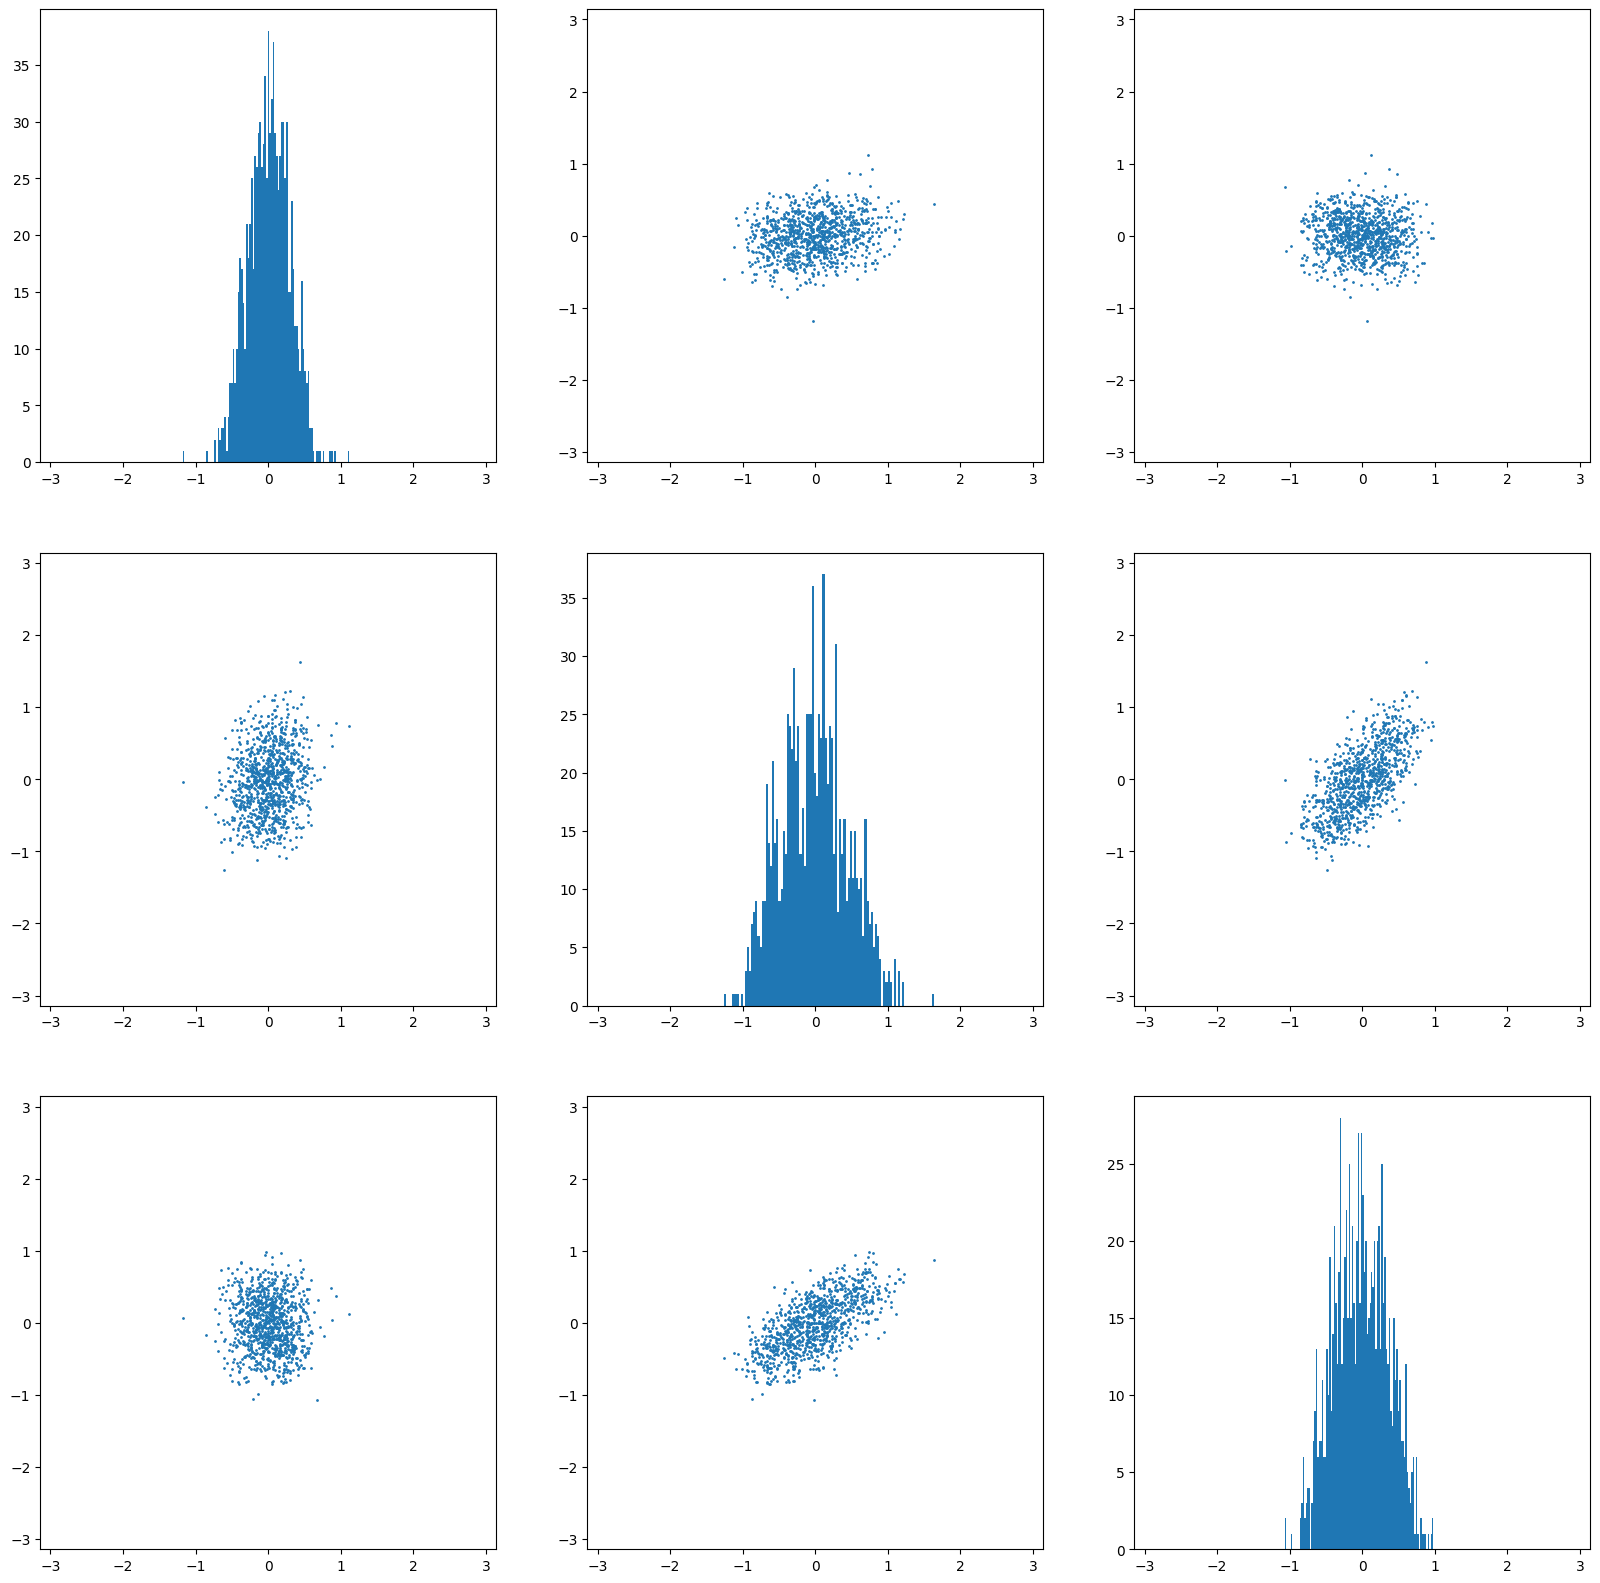

In [14]:
fig,axs = plt.subplots(3,3, figsize=(20,20))
for k in range(3):
    for j in range(3):
        if k==j :
            axs[k,j].hist(sample_1[:,k], bins=100)
            axs[k,j].set_xlim(-np.pi, np.pi)
        else:
            axs[k,j].scatter(sample_1[:,j], sample_1[:,k], s=1)
            axs[k,j].set_xlim(-np.pi, np.pi)
            axs[k,j].set_ylim(-np.pi, np.pi)
plt.show()

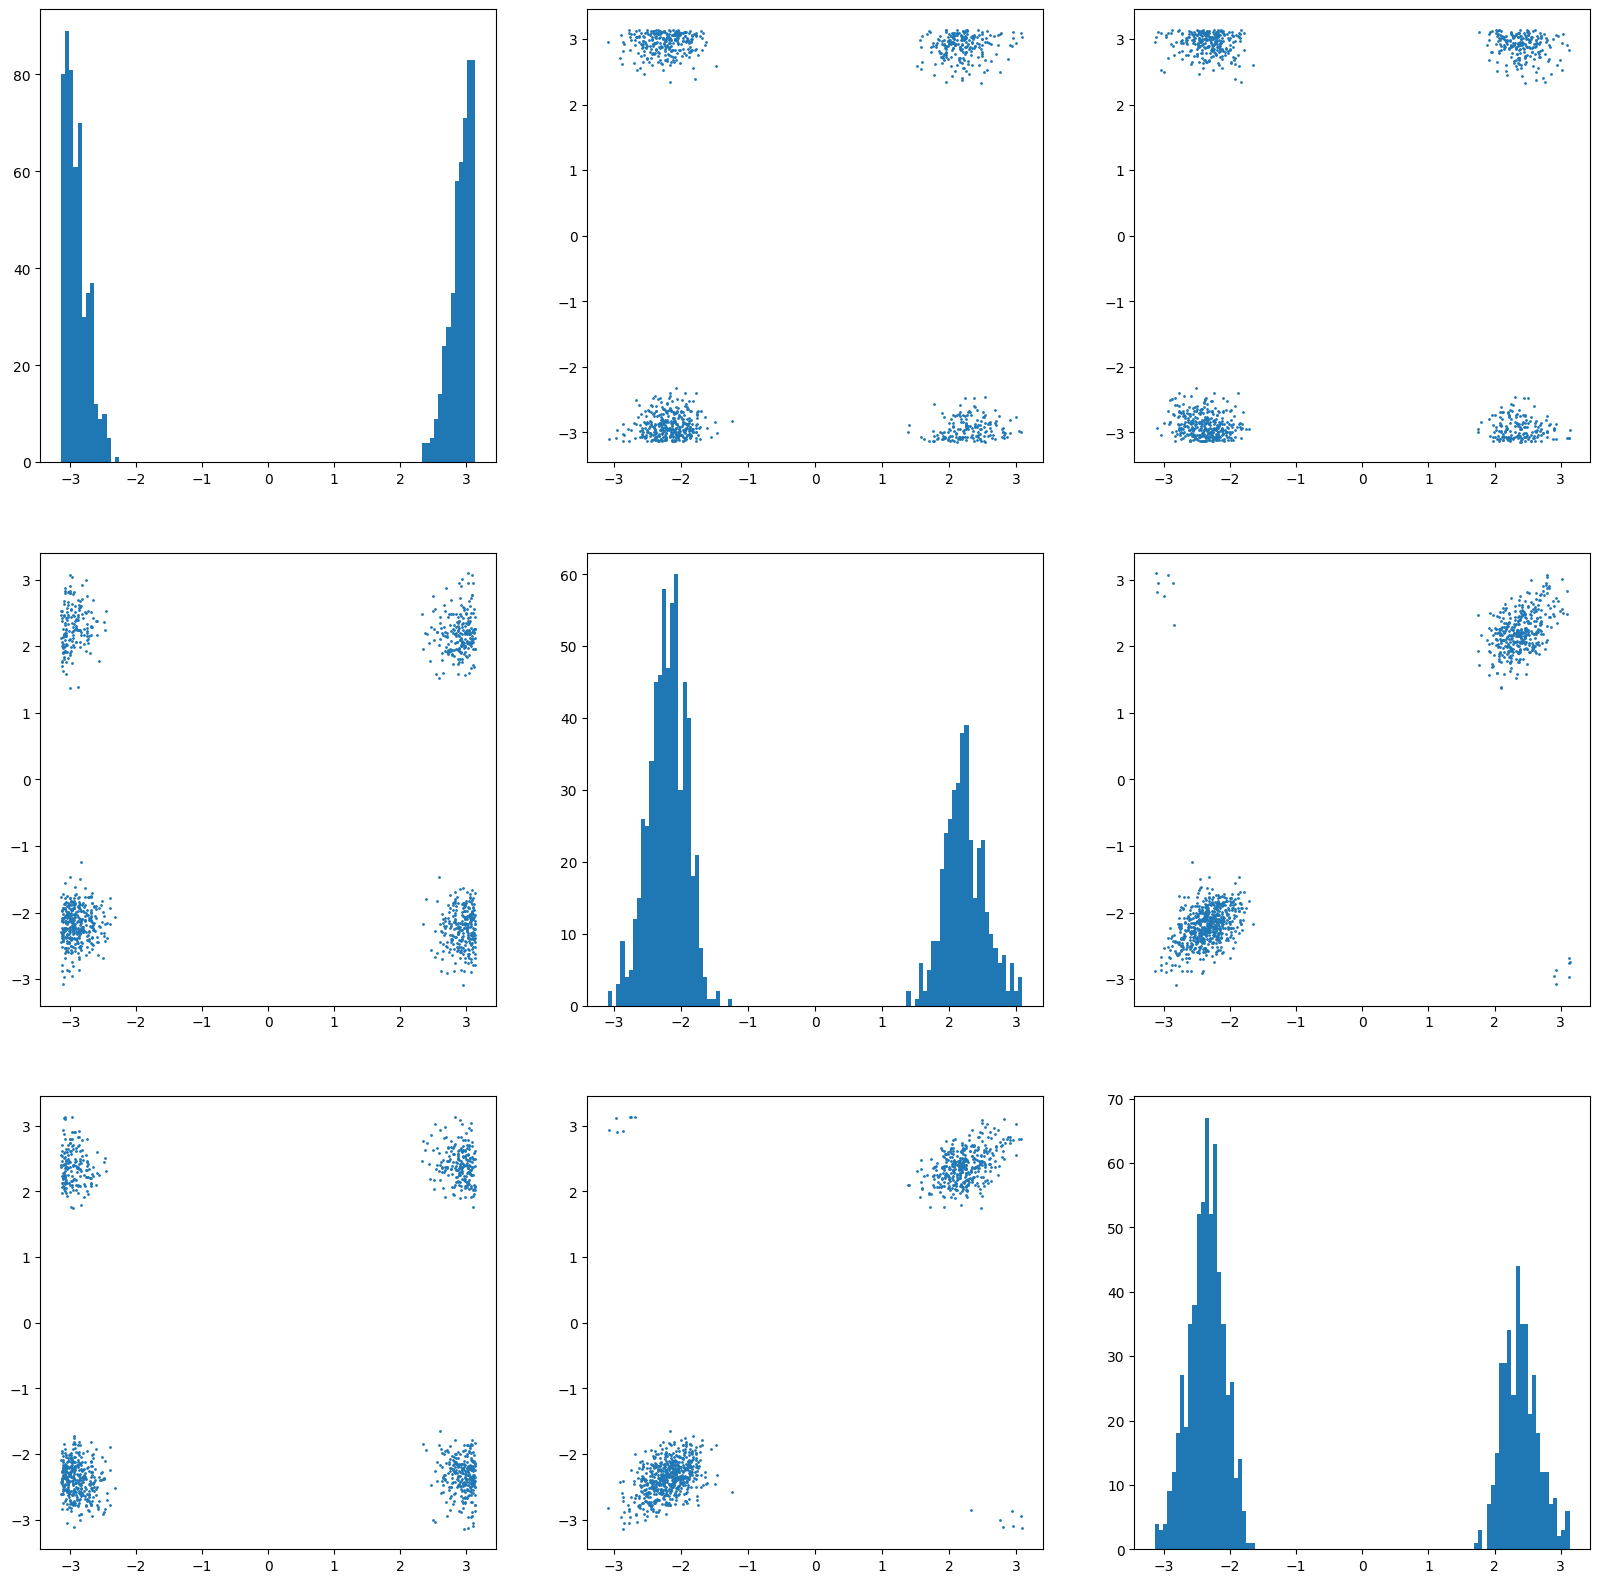

In [15]:
fig,axs = plt.subplots(3,3, figsize=(20,20))
for k in range(3):
    for j in range(3):
        if k==j :
            axs[k,j].hist(sample_2[:,k], bins=100)
        else:
            axs[k,j].scatter(sample_2[:,j], sample_2[:,k], s=1)
plt.show()

# Energy 

In [16]:
energy_model = MixtureSineMultivariateVonMisesEnergy(dim=3, nb_cluster=2, learn_theta=True, learn_kappa=True, learn_lambda=True)

In [7]:
# Use kmeans :
import sklearn.cluster
kmeans = sklearn.cluster.KMeans(n_clusters=17)
kmeans.fit(data_train)



/opt/miniconda3/envs/lime_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=17)

NameError: name 'kmeans' is not defined

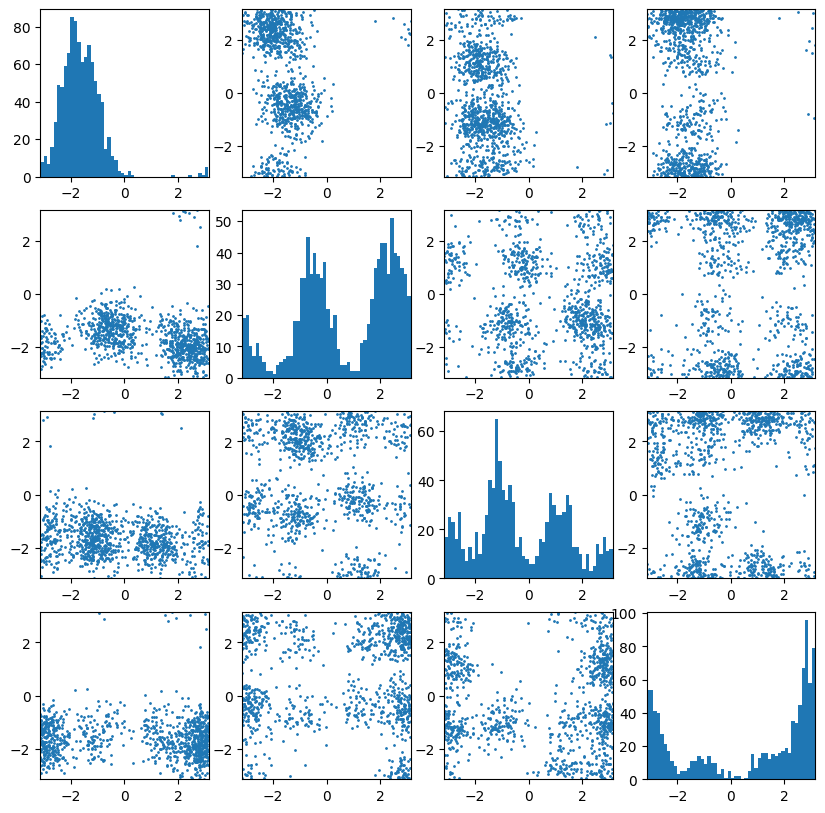

In [9]:
x = energy_model.sample(1000)
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(4):
    for j in range(4):
        if i == j:
            axs[i, j].hist(x[:, i], bins=50)
            axs[i, j].set_xlim(-np.pi, np.pi)
        else:
            axs[i, j].scatter(x[:, i], x[:, j], s=1)
            axs[i, j].set_xlim(-np.pi, np.pi)
            axs[i, j].set_ylim(-np.pi, np.pi)
plt.show()
        

In [10]:
real_energy_model = MixtureSineMultivariateVonMisesEnergy(dim=4, nb_cluster=17, learn_theta=True, learn_kappa=True, learn_lambda=True)

parameters = torch.from_numpy(np.array([
    [-1.4,  2.5,  0.1, -1.0,  6.3, -3.1, -3.1, -24.4, -6.0,  4.3],
    [-2.1,  2.2,  2.1, -1.5, -7.6, 11.0,  8.3,  10.4, -7.4, -26.9],
    [-1.6,  2.8, -2.0, -0.2,  6.7,  1.8, -1.9,   7.2, -2.3,   5.0],
    [-1.1, -0.5,  0.3, -0.2,  5.3,  3.9, -4.1, -39.3, 28.1, -52.8],
    [-1.2, -0.3, -2.0, -0.2, 29.2,  3.7,  5.3,   5.2, -1.6,  -3.1],
    [-1.2, -0.5,  0.3, -2.0, 15.9,  3.4, -4.3,  -4.6, -4.9,  -1.5],
    [-1.3,  2.3,  2.0, -0.1, -29.0, 39.5,  5.4,   9.2, 14.7, -38.1],
    [-2.0,  2.2,  2.1,  2.0, -1.6, -10.3, -19.6, -12.6, -1.2,  12.2],
    [-1.9,  0.1, -2.0, -0.2,  4.7, -25.1,  1.2,   1.6,  1.9, -11.9],
    [-2.4,  2.5,  0.1, -0.2,  4.2,  1.7, -1.0, -30.6, -0.4,   9.3],
    [-1.4, -0.8,  2.0, -0.2, -3.8,  2.1,  2.4,  15.9, -3.1, -12.8],
    [-2.2,  2.7, -2.1, -0.2, 16.1, -20.3,  1.9,  -8.5, 12.4,  -7.4],
    [-1.6,  2.2,  2.2,  2.1, -0.4, 20.3,  2.8,  11.8, -0.3, -22.6],
    [-1.2, -0.7,  2.0,  2.1, -6.4, 19.5,  1.5,  -7.5,  1.2, -19.7],
    [-2.1,  2.2,  2.1, -0.2, 26.4, 13.1,  6.1,  12.5, -11.4,  -2.2],
    [-1.8,  2.1,  2.1, -0.2, -2.3,  7.7,  7.8,   8.4,  4.3,  -3.3],
    [-1.1, -0.8,  2.0, -0.2, 62.3, 40.7, 16.4,  14.6, -20.0, -16.8],
])).to(torch.float32)
theta = parameters[:, :4]

lambda_ = parameters[:, 4:]



parameters_2 = torch.from_numpy(np.array([
    [1.17,  23, 6.6,   47.1,   60.1,   3.6,    156,   2592],
    [1.33,  27, 33.1,  15.8,  115.4,  14.7,    451,   9433],
    [1.75,  35, 6.8,   38.0,   31.0,   9.6,    226,   2784],
    [1.75,  35, 12.9,  48.9,   75.9,  95.4,   1167,  21345],
    [1.96,  39, 89.7,  65.5,   96.4,  47.7,   4762,  51966],
    [2.25,  45, 25.1,  52.6,   27.4,  55.7,   1232,  14217],
    [2.41,  48, 58.1, 131.9,  188.1,  55.8,   6409,  89678],
    [3.10,  62, 48.2,  39.6,   66.7,  42.2,   1956,  23199],
    [3.64,  73, 26.2,  18.4,  133.4,  20.4,    968, 114510],
    [4.03,  81, 14.0,  34.3,  123.9,  97.5,   2054, 241211],
    [4.89,  98, 9.2,   14.6,  125.9,  35.4,    644,  77412],
    [5.20, 104, 56.7,  45.0,   93.0,  76.5,   3772, 426013],
    [6.85, 137, 17.4,  23.7,  115.8,  87.3,   1671, 203914],
    [7.30, 146, 21.2,  41.2,   96.8,  45.8,   1620, 196815],
    [8.47, 169, 42.1,  95.1,   87.0,  35.4,   2928, 350916],
    [20.89, 418, 13.6, 27.7,  108.9,  68.7,   1529, 168017],
    [23.01, 460, 202.7, 242.4, 199.4, 101.8, 28747, 31572],
])).to(torch.float32)

pi = parameters_2[:, 0, None]
n_i = parameters_2[:, 1, None]
kappa = parameters_2[:, 2:7]


for cluster in range(real_energy_model.nb_cluster) :
    real_energy_model.logit_pi[cluster].data = torch.log(pi[cluster])
    real_energy_model.sine_multivariate_von_mises[cluster].log_kappa.data = torch.log(kappa[cluster])
    real_energy_model.sine_multivariate_von_mises[cluster].theta.data = theta[cluster]
    index_mat = 0
    for i in range(4):
        for j in range(i +1,4):
            print(i,j)
            real_energy_model.sine_multivariate_von_mises[cluster].lam[i,j].data = lambda_[cluster][index_mat]
            index_mat+=1


0 1
0 2
0 3
1 2
1 3
2 3
0 1
0 2
0 3
1 2
1 3
2 3
0 1
0 2
0 3
1 2
1 3
2 3
0 1
0 2
0 3
1 2
1 3
2 3
0 1
0 2
0 3
1 2
1 3
2 3
0 1
0 2
0 3
1 2
1 3
2 3
0 1
0 2
0 3
1 2
1 3
2 3
0 1
0 2
0 3
1 2
1 3
2 3
0 1
0 2
0 3
1 2
1 3
2 3
0 1
0 2
0 3
1 2
1 3
2 3
0 1
0 2
0 3
1 2
1 3
2 3
0 1
0 2
0 3
1 2
1 3
2 3
0 1
0 2
0 3
1 2
1 3
2 3
0 1
0 2
0 3
1 2
1 3
2 3
0 1
0 2
0 3
1 2
1 3
2 3
0 1
0 2
0 3
1 2
1 3
2 3
0 1
0 2
0 3
1 2
1 3
2 3


In [11]:
sample = real_energy_model.sample(1000)

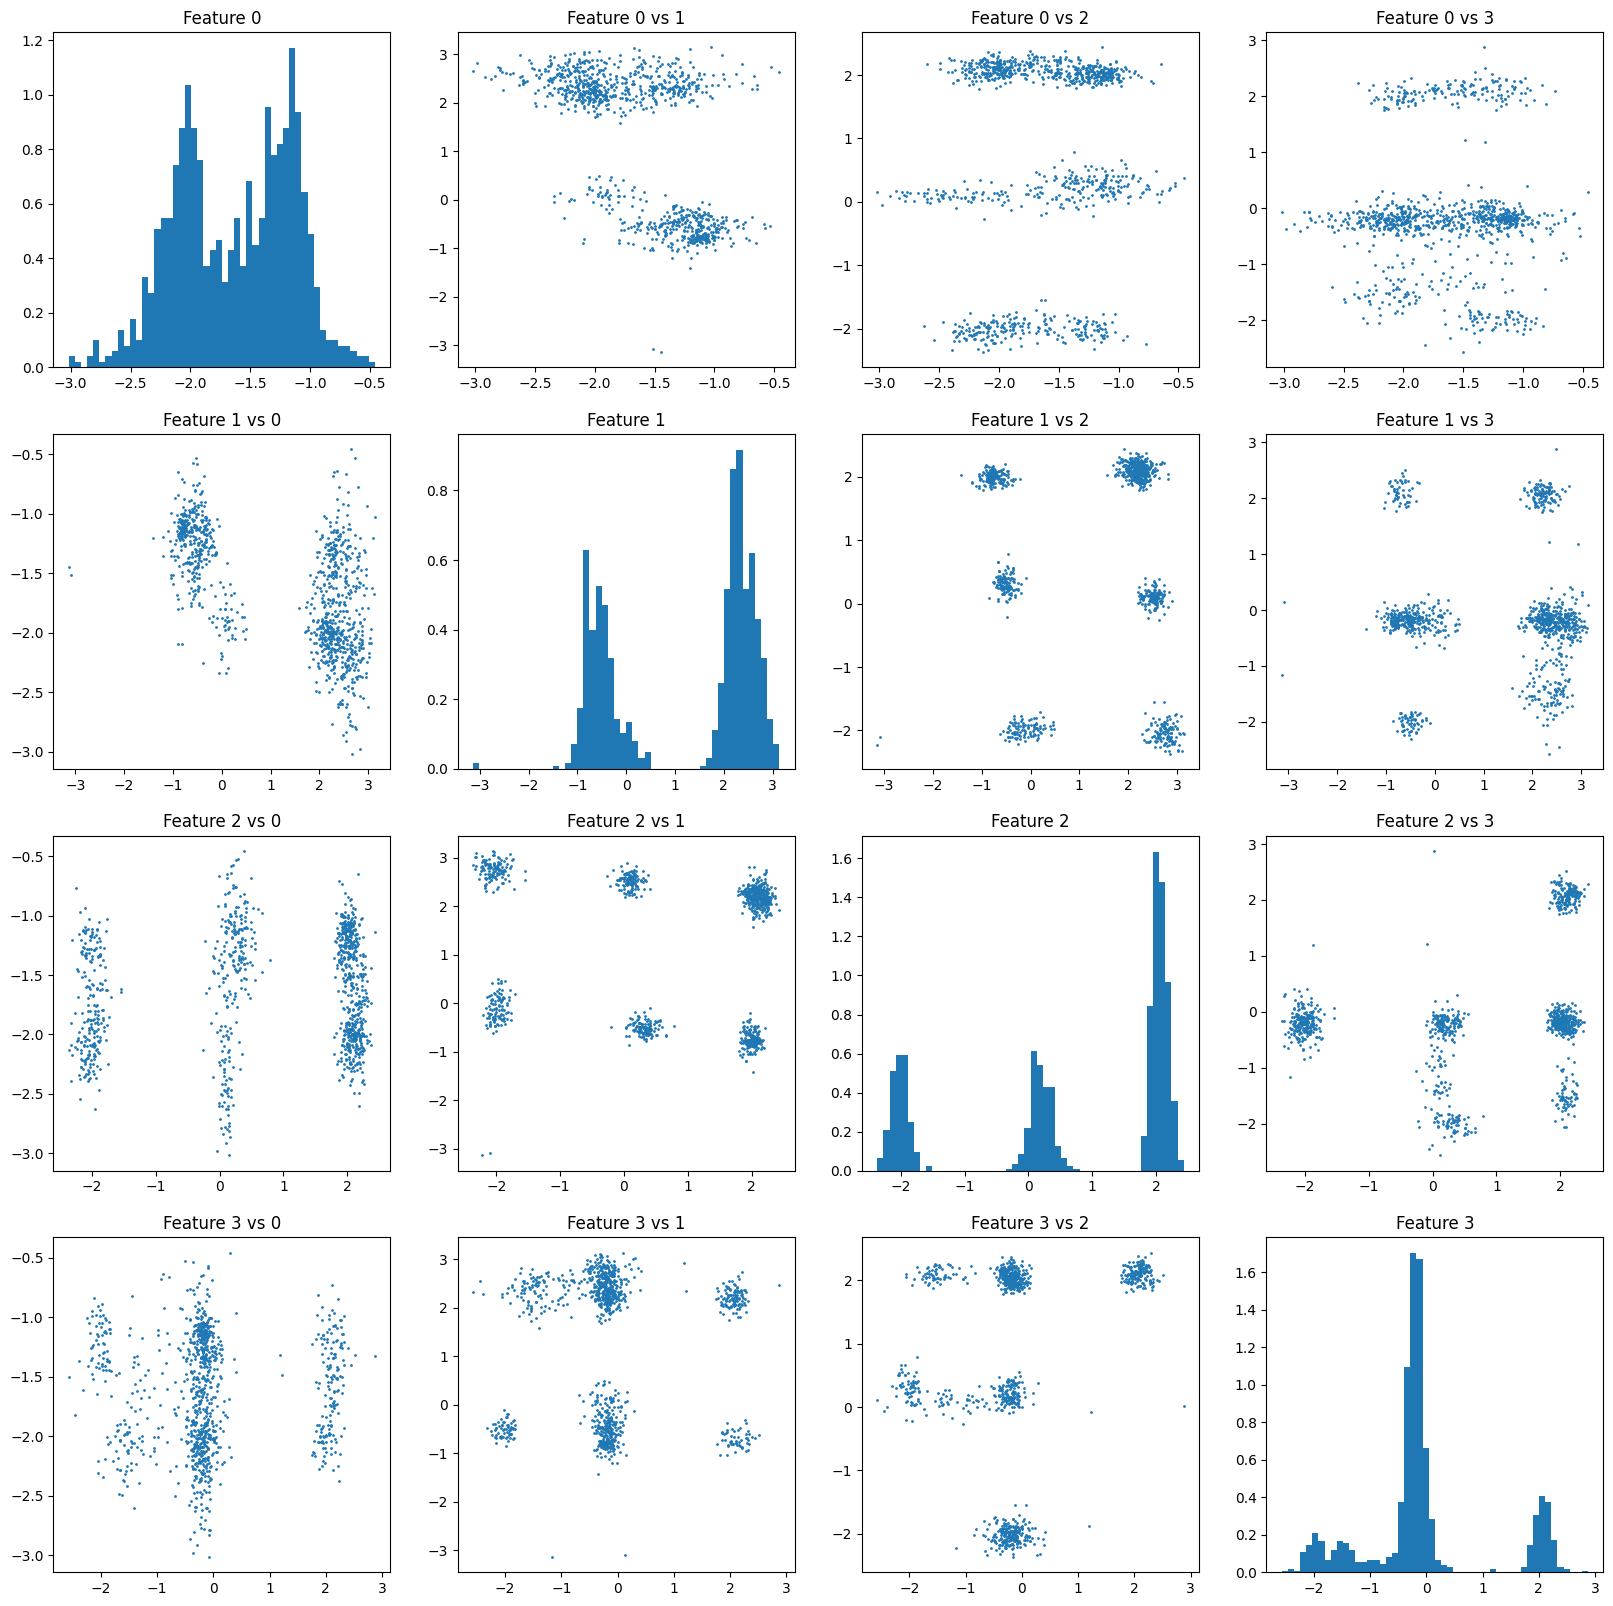

In [12]:
# sample = proposal_distribution.sample(10000)
# print(sample)

fig, axs = plt.subplots(4, 4, figsize=(20, 20))
for i in range(4):
    for j in range(4):
        if i != j:
            axs[i, j].scatter(sample[:, i], sample[:, j], s=1)
            axs[i, j].set_title(f"Feature {i} vs {j}")
        else:
            axs[i, j].hist(sample[:, i], bins=50, density=True)
            axs[i, j].set_title(f"Feature {i}")

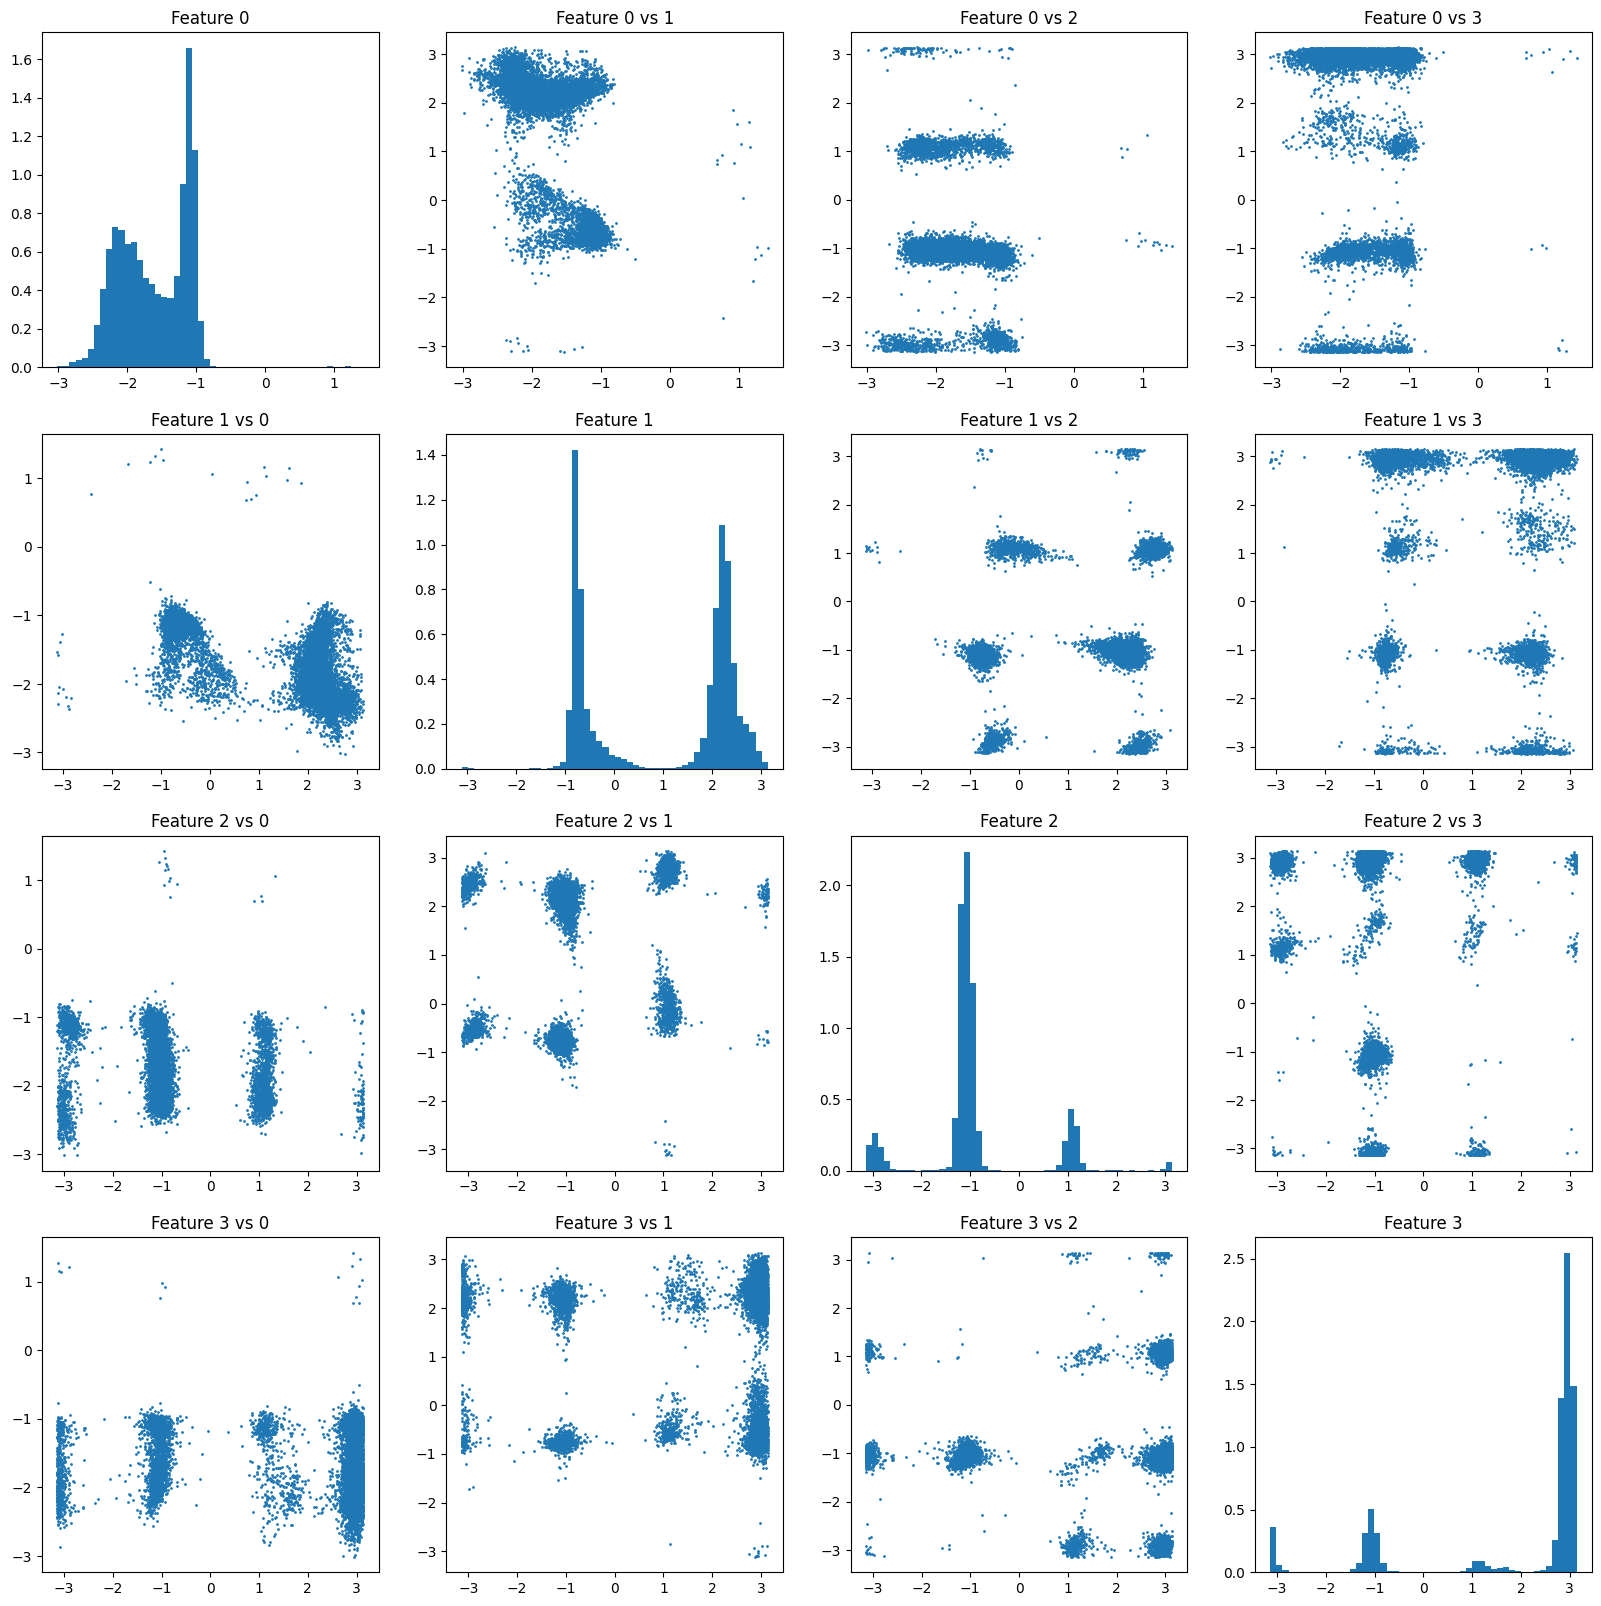

In [13]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
for k in range(4):
    for l in range(4):
        if k == l:
            axs[k, l].hist(data_train[:, k], bins=50, density=True)
            axs[k, l].set_title(f"Feature {k}")
        else:
            axs[k, l].scatter(data_train[:, k], data_train[:, l], s=1)
            axs[k, l].set_title(f"Feature {k} vs {l}")
plt.show()

# Trainer 

In [14]:
trainer = SNLTrainer(energy_model, proposal_distribution, dataloader=data_loader_train, val_dataloader=data_loader_val, lr=1e-2)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: hugosenetaire. Use `wandb login --relogin` to force relogin


In [15]:
# energy_model.theta.data = phi
# energy_model.log_kappa.data = kappa
# energy_model.lam.data = lam

In [16]:
trainer.train(n_iter = 200000, n_iter_pretrain= 1000)

/Users/hhjs/Documents/Projects/SNL_directional/Model/Energy/mixture_sine_multivariate_von_mises.py:120: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  torch.nn.functional.log_softmax(


KeyboardInterrupt: 